In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Path to your CSV file
file_path = '/content/drive/MyDrive/MY DATA/loan_final313.csv'

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE


Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head(20)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster
5,1075269,2011,01/12/2011,1012015,3.0,RENT,1,Low,36000,1,...,0,7.90,A,1,11.20,5631.377753,5000.00,0.00,156.46,munster
6,1069639,2011,01/12/2011,1012016,8.0,RENT,1,Low,47004,1,...,0,15.96,C,3,23.51,8136.840000,5110.85,0.00,170.08,leinster
7,1072053,2011,01/12/2011,1012015,9.0,RENT,1,Low,48000,1,...,0,18.64,E,5,5.35,3938.144334,3000.00,0.00,109.43,ulster
8,1071795,2011,01/12/2011,1042012,4.0,OWN,2,Low,40000,1,...,1,21.28,F,6,5.55,646.020000,162.02,189.06,152.39,ulster
9,1071570,2011,01/12/2011,1112012,0.5,RENT,1,Low,15000,1,...,1,12.69,B,2,18.08,1476.190000,673.48,269.29,121.45,munster


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [8]:
#drop the columns dosen't effect to my target
df.drop(['term','application_type','income_category','grade','home_ownership','purpose','interest_payments','loan_condition','id','loan_condition','year'],axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   issue_d               887379 non-null  object 
 1   final_d               887379 non-null  int64  
 2   emp_length_int        887379 non-null  float64
 3   home_ownership_cat    887379 non-null  int64  
 4   annual_inc            887379 non-null  int64  
 5   income_cat            887379 non-null  int64  
 6   loan_amount           887379 non-null  int64  
 7   term_cat              887379 non-null  int64  
 8   application_type_cat  887379 non-null  int64  
 9   purpose_cat           887379 non-null  int64  
 10  interest_payment_cat  887379 non-null  int64  
 11  loan_condition_cat    887379 non-null  int64  
 12  interest_rate         887379 non-null  float64
 13  grade_cat             887379 non-null  int64  
 14  dti                   887379 non-null  float64
 15  

In [10]:
df.isnull().sum().sort_values(ascending=False)

,0
issue_d,0
final_d,0
emp_length_int,0
home_ownership_cat,0
annual_inc,0
income_cat,0
loan_amount,0
term_cat,0
application_type_cat,0
purpose_cat,0


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

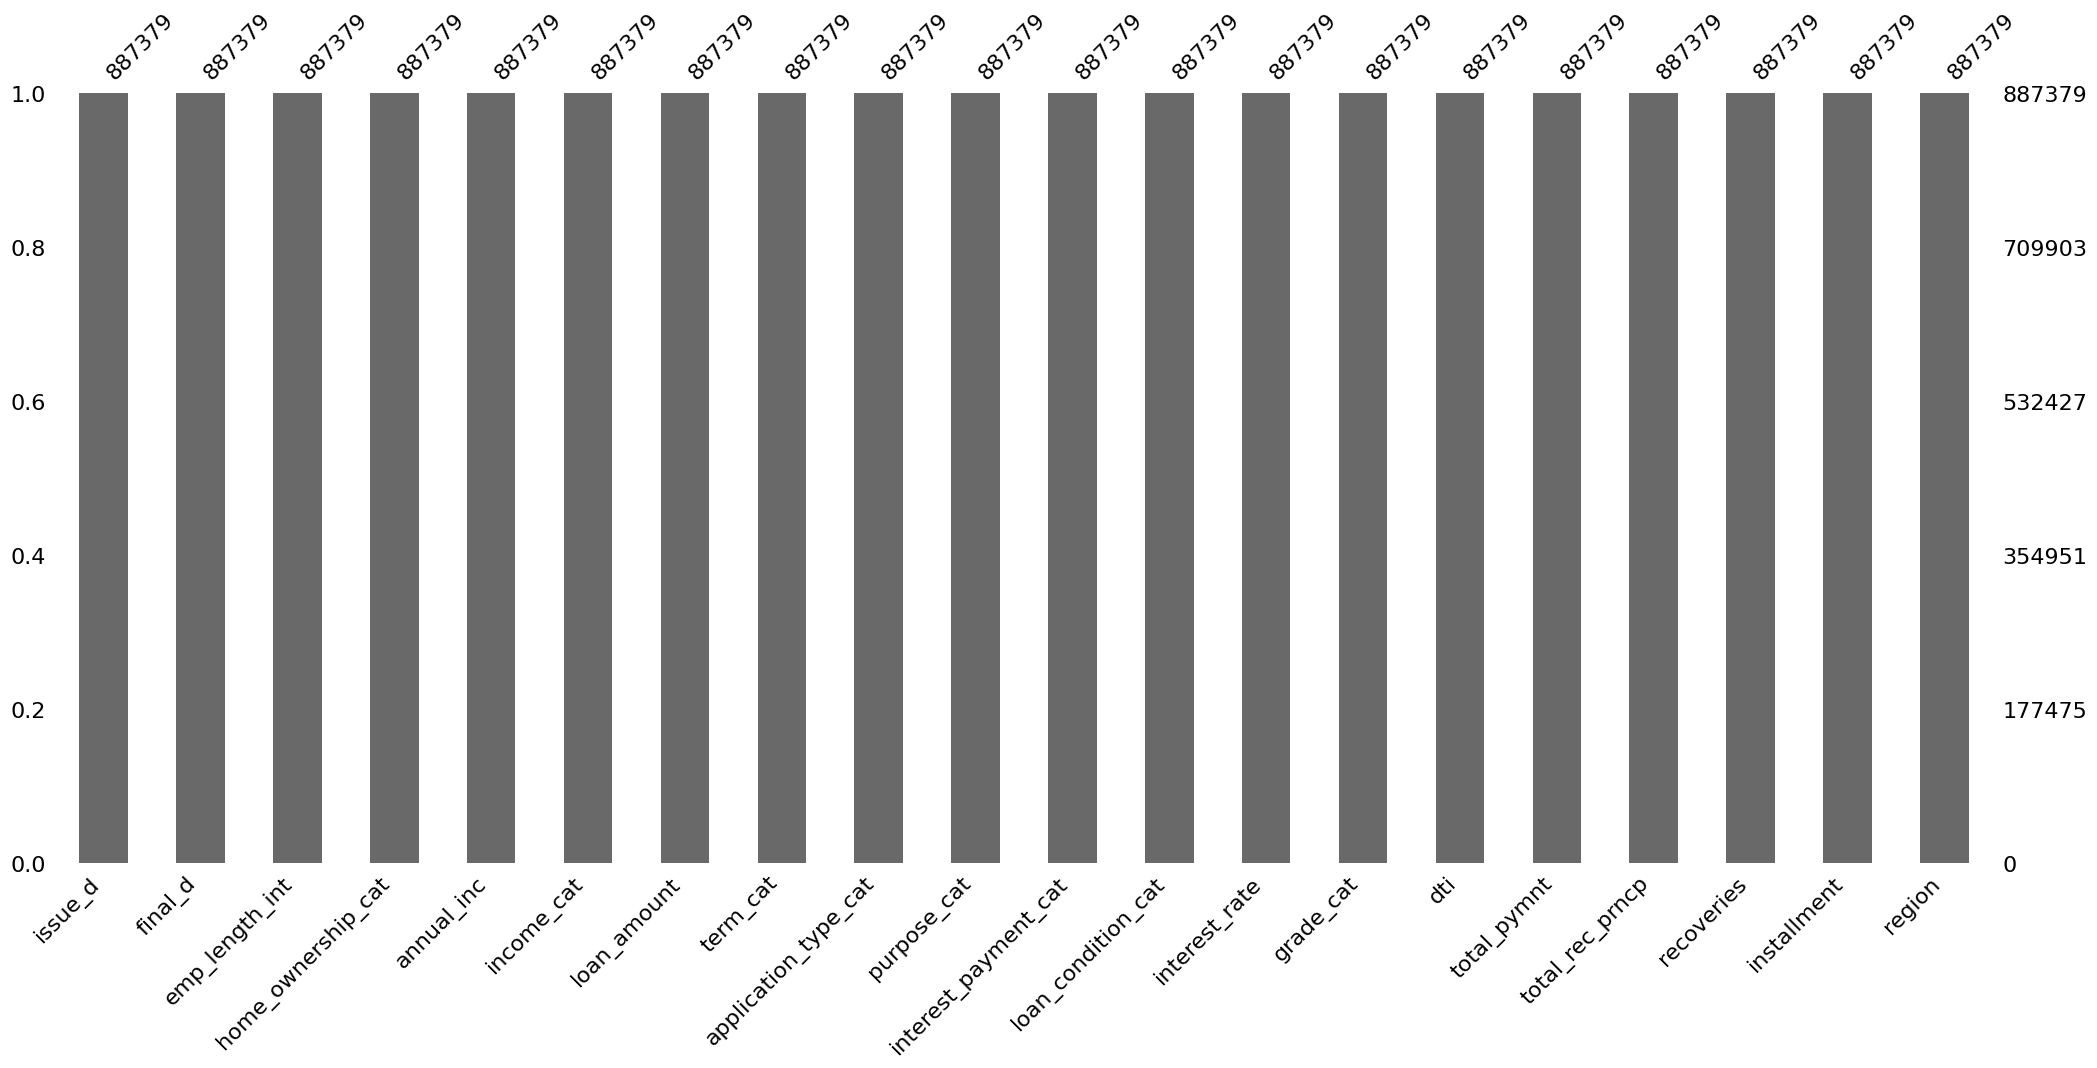

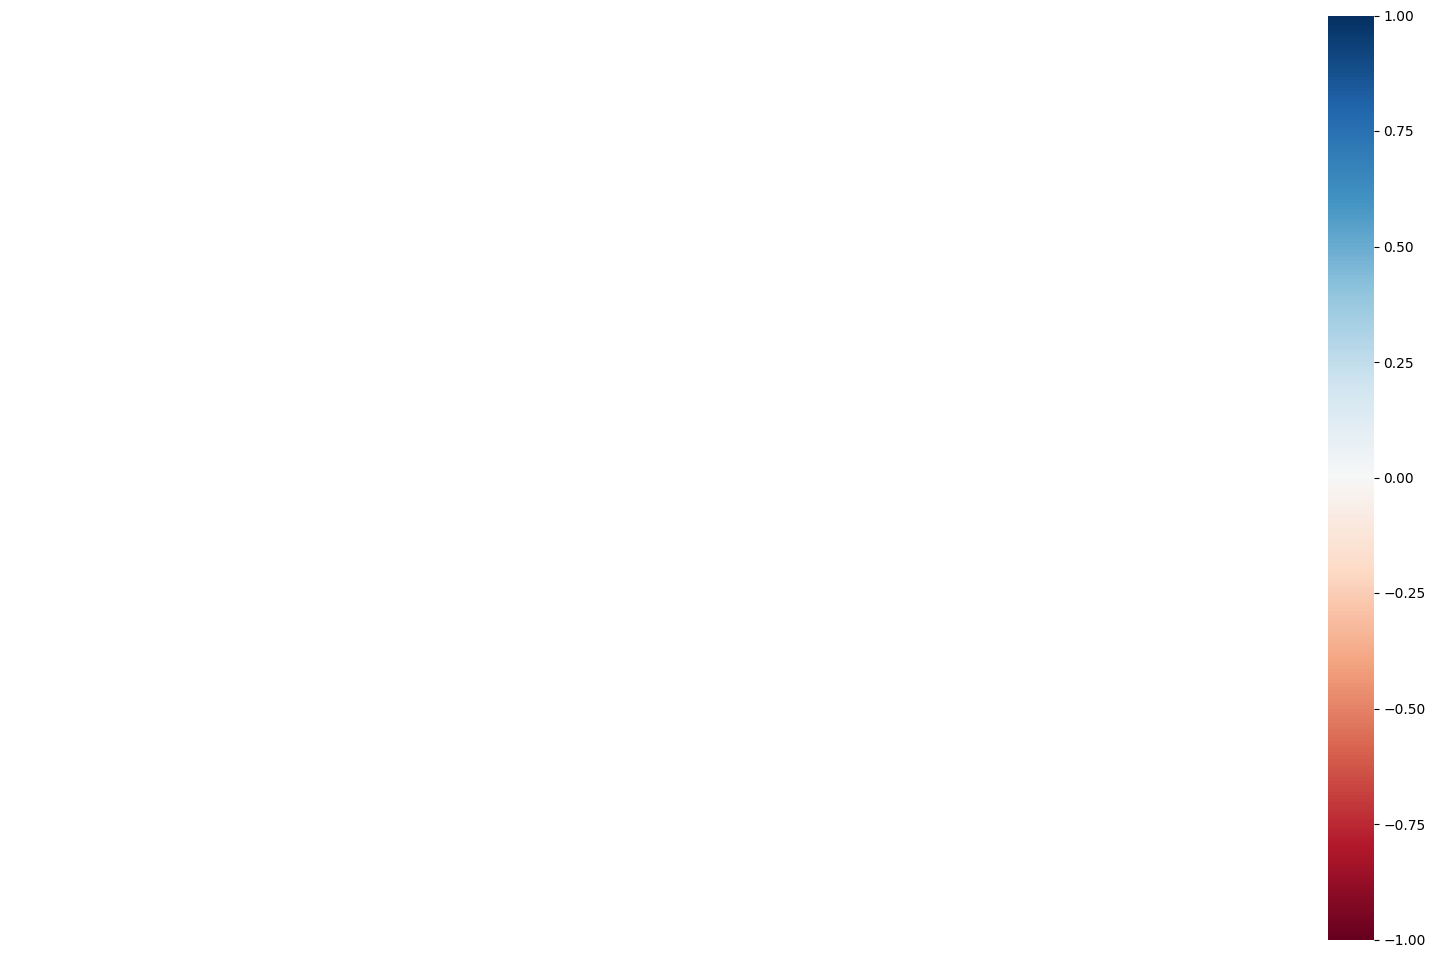

In [11]:
import missingno as msno
msno.bar(df)
msno.heatmap(df)
#There is no missing values

In [12]:
df.nunique()

,0
issue_d,103
final_d,98
emp_length_int,12
home_ownership_cat,6
annual_inc,45784
income_cat,3
loan_amount,1372
term_cat,2
application_type_cat,2
purpose_cat,14


In [19]:

for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].astype('category')


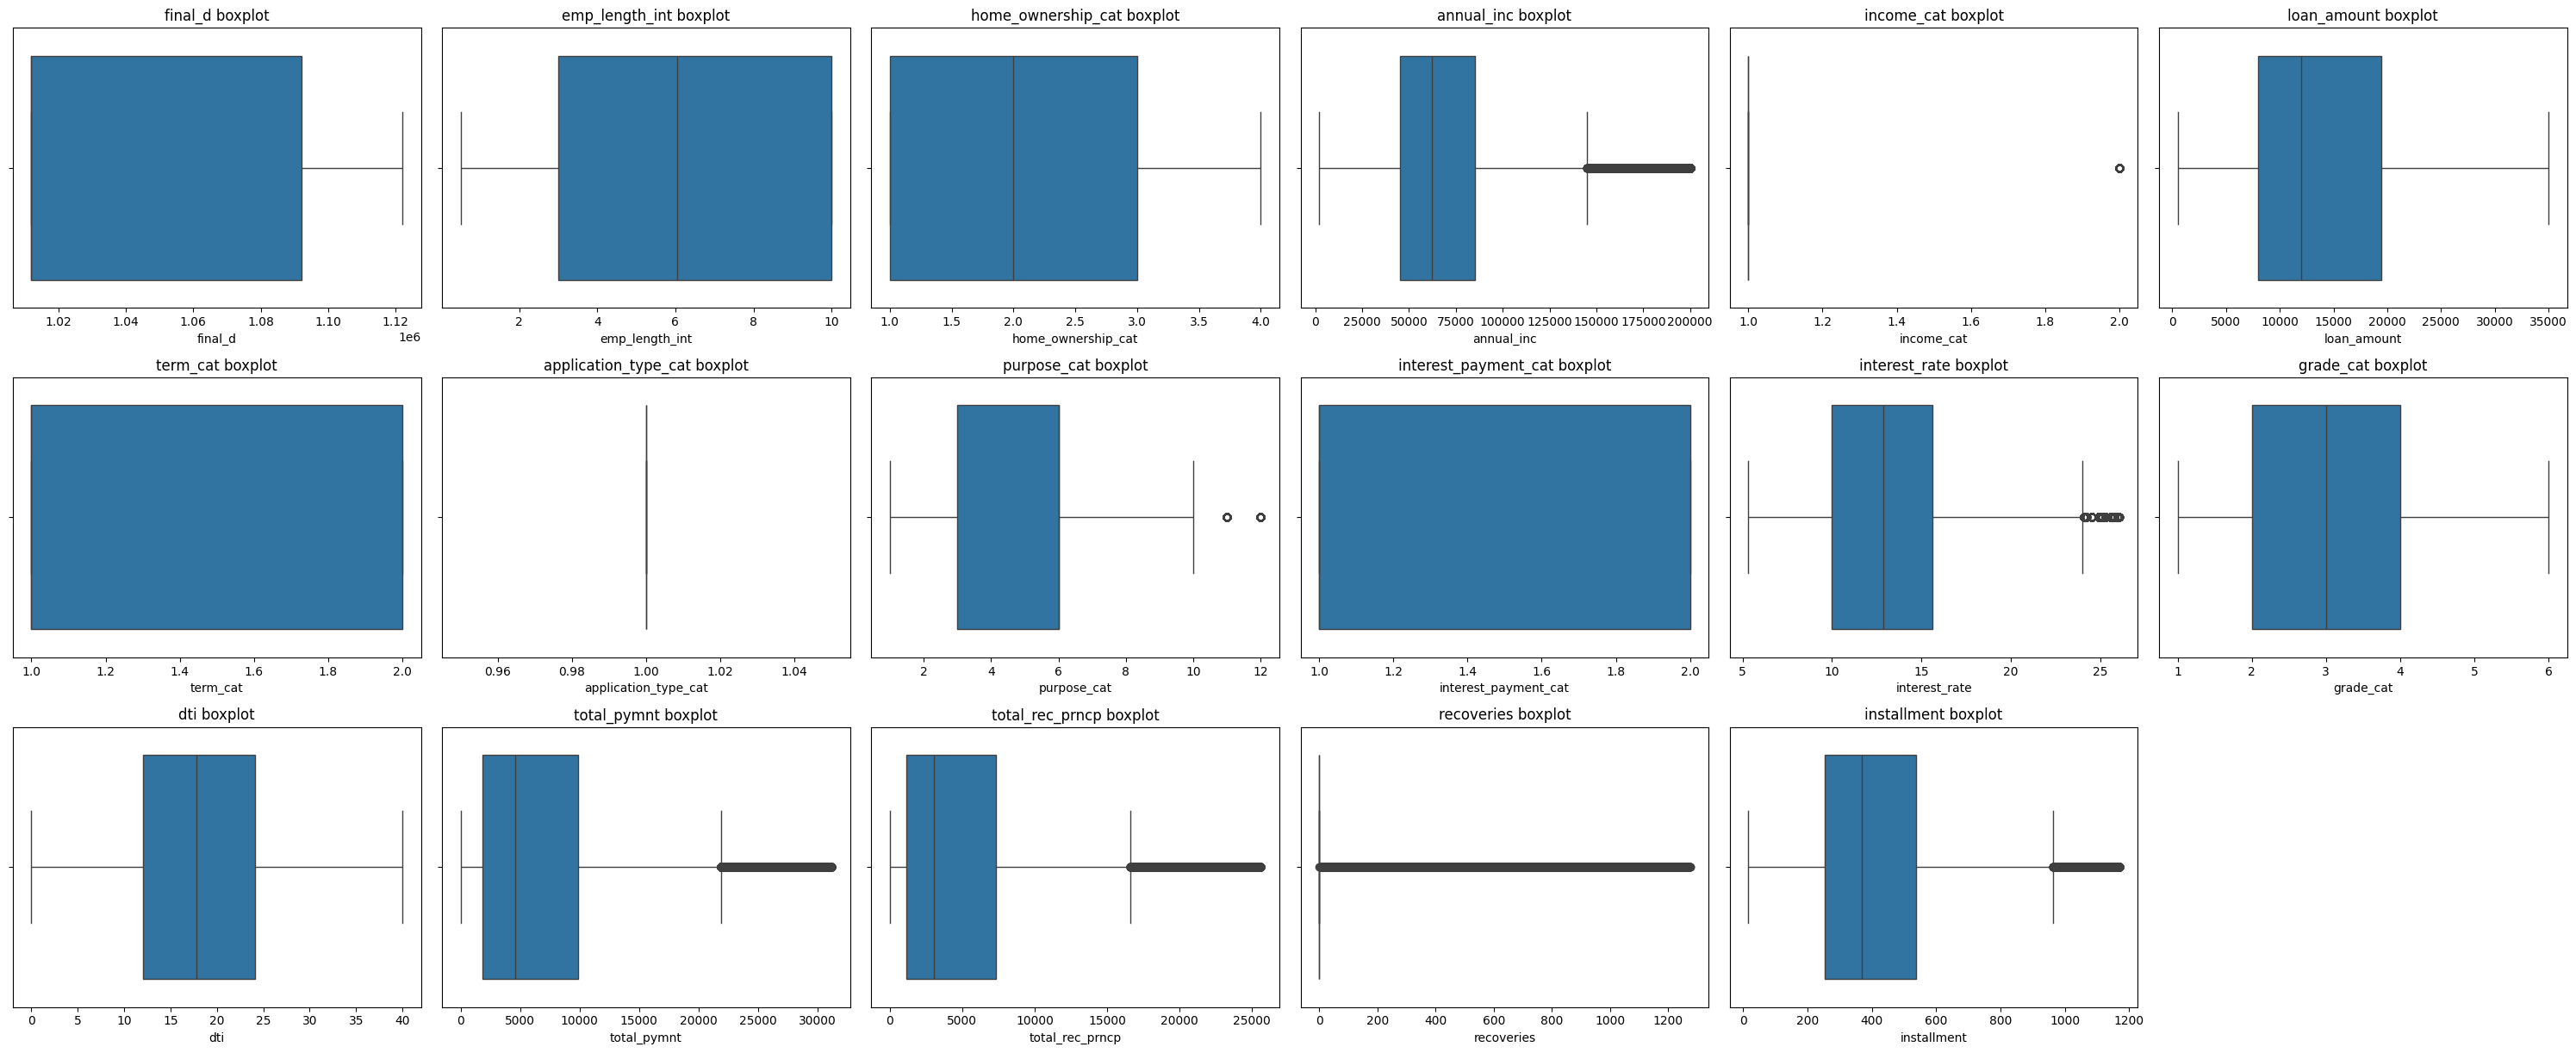

In [20]:
# check for outliers
num_cols = df.select_dtypes("number").columns.drop("loan_condition_cat")
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(30, 20))
for i, col in enumerate(num_cols):
    plt.subplot(5, 6, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.tight_layout()

In [15]:
# removig the outliers
from scipy import stats
df = df[(np.abs(stats.zscore(df[num_cols])) < 3).all(axis=1)]


In [21]:
# Encoding the category cols
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
# Spliting my Target
X = df.drop('loan_condition_cat', axis=1)
y = df['loan_condition_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:05:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9868

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    154866
           1       1.00      0.80      0.89     10739

    accuracy                           0.99    165605
   macro avg       0.99      0.90      0.94    165605
weighted avg       0.99      0.99      0.99    165605



# There an imbalanced data

<ipython-input-27-e84d9923794a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='loan_condition_cat', data=df, palette='viridis')


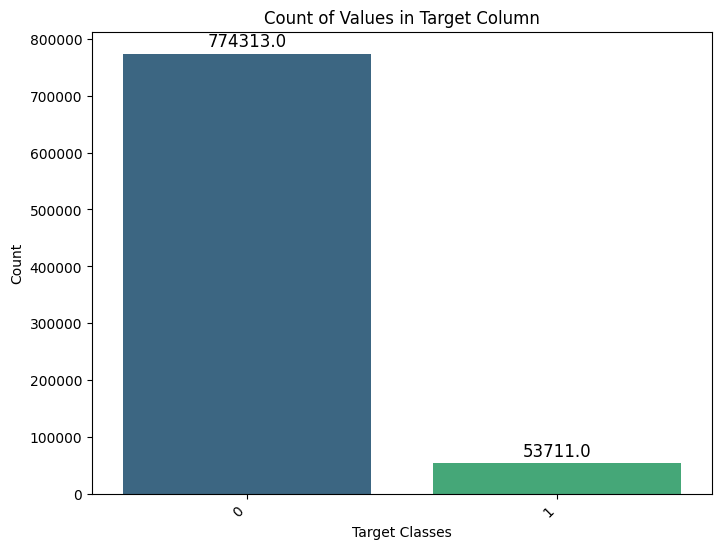

In [ ]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_condition_cat', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Values in Target Column')
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.show()

# Enhanced Visualizations
# Change 'target_column' to 'loan_condition_cat'
sns.pairplot(df, hue='loan_condition_cat')
plt.title('Pairplot of Features')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    max_depth=4,
    min_child_weight=2,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=5
)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.9622

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    163936
           1       0.70      0.88      0.78     13540

    accuracy                           0.96    177476
   macro avg       0.85      0.92      0.88    177476
weighted avg       0.97      0.96      0.96    177476



<ipython-input-30-70a24142606b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


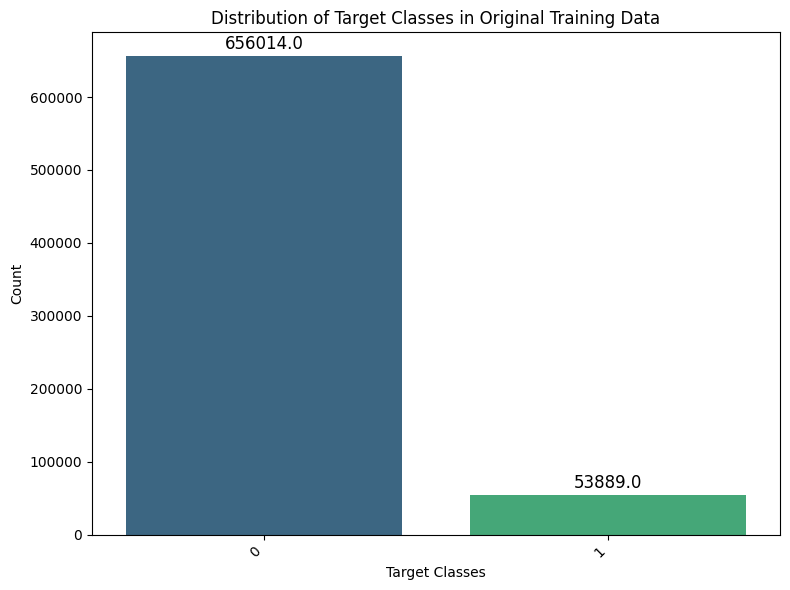

<ipython-input-30-70a24142606b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


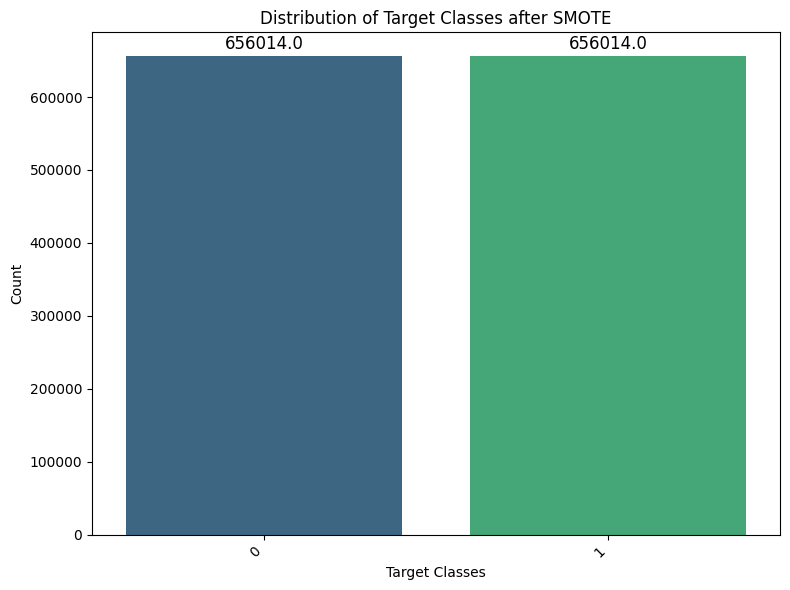

Original training data shape: loan_condition_cat
0    656014
1     53889
Name: count, dtype: int64
Resampled training data shape: loan_condition_cat
0    656014
1    656014
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to create countplot
def create_countplot(data, title):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=data, palette='viridis')
    plt.title(title)
    plt.xlabel('Target Classes')
    plt.ylabel('Count')

    # Annotate the bars with the count values
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot original training data distribution
create_countplot(y_train, 'Distribution of Target Classes in Original Training Data')

# Plot SMOTE-resampled training data distribution
create_countplot(y_train_smote, 'Distribution of Target Classes after SMOTE')

# Optional: If you want to see the difference in actual numbers
print("Original training data shape:", pd.Series(y_train).value_counts())
print("Resampled training data shape:", pd.Series(y_train_smote).value_counts())
# Additional Models for Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'{name} Accuracy: {acc:.4f}')
    print(classification_report(y_test, y_pred))

# Visualize model performance
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
